## Data Anlysis from Last FM Dataset

In [1]:
import pandas as pd 
import numpy as np 
import pylast

import os 
import json 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from datetime import datetime

Getting the data

In [2]:
users_path = '../data/lastfm-api/1k_users_info_lastfm.json'
with open(users_path, 'r') as f:
    users_info = json.load(f)

In [3]:
print('The number of considered users is {}'.format(len(users_info)))

The number of considered users is 1000


In [4]:
countries = {}
ages = {}
subscriber = {}
registered_since = []
gender = {}
playlists = []
playcount = []
for key in users_info.keys():
    if len(users_info[key]) == 0:
        continue
    c = users_info[key]['country'] 
    a = users_info[key]['age']
    s = users_info[key]['subscriber']
    r = users_info[key]['registered_since']
    g = users_info[key]['gender']
    p = users_info[key]['playlists']
    pl = users_info[key]['playcount']

    if c in countries:countries[c] += 1
    else: countries[c] = 1

    if a in ages: ages[a] += 1
    else: ages[a] = 1

    if s in subscriber: subscriber[s] += 1
    else: subscriber[s] = 1

    if g in gender: gender[g] += 1
    else: gender[g] = 1

    registered_since.append(datetime.utcfromtimestamp(int(r)))
    playlists.append(int(p))
    playcount.append(int(pl))

print('Age')
print(ages)
print('Gender')
print(gender)
print('Playlists')
print(set(playlists))

Age
{0: 999}
Gender
{'n': 999}
Playlists
{0}


I observe all the users considered don't insert age information neither gender. Create playlists in Last.fm is not a common thing too!

In [5]:
countries_df = pd.DataFrame(countries, index = ['quantity']).sort_values(by = 'quantity', ascending=False, axis = 1)
fig, ax = plt.subplots(figsize = (20,6))
sns.barplot(data = countries_df.filter(axis = 1, 
                                       items = [col for col in countries_df if countries_df[col].loc['quantity'] > 2]), 
            ax = ax)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60)
ax.set_title('Users Countries', fontsize = 20)
ax.set_xlabel('Countries')
plt.show()

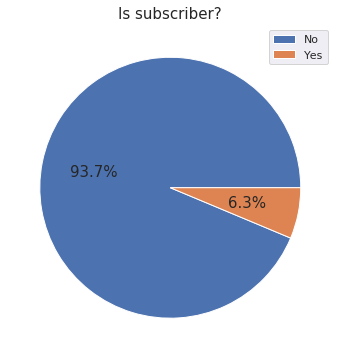

In [6]:
fig, ax = plt.subplots(figsize = (12,6))
ax.pie(subscriber.values(), labels = ['No', 'Yes'], labeldistance = None,
       autopct='%1.1f%%', textprops = {'fontsize': 15})
ax.set_title('Is subscriber?', fontsize = 15)
ax.legend()
plt.show()

In [7]:
years = [date.year for date in registered_since]
months = [date.month for date in registered_since]
fig, ax = plt.subplots(1,2, figsize = (24, 8))
sns.distplot(years, kde = False, bins = max(years) - min(years) + 1, norm_hist = True, ax = ax[0])
ax[0].set_title('Year')
sns.distplot(months, kde = False, bins = 12, norm_hist = True, ax = ax[1])
ax[1].set_title('Month')
fig.suptitle('When the users were registered?')
plt.show()

In the following graphics: for each x, f(x) if the quantity that x people have obtained (at least)!

In [8]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set(xscale = 'log', yscale = 'log', xlim = (1,1000), ylim = (1, 6000000))
sns.scatterplot(x = range(1, len(playcount) + 1), 
            y = sorted(playcount, reverse=True), s = 80, color = 'grey')
ax.set_title('Playcounts', fontsize = 14)
ax.set_xlabel('Number of people')
plt.show()

In [215]:
loved_tracks = []
top_tracks = []
top_artists = []
top_tags = []
for user_id in users_info.keys():
    if len(users_info[user_id]) == 0:
        continue
    loved_tracks.extend(users_info[user_id]['loved_tracks'])
    top_tracks.extend(users_info[user_id]['top_tracks'])
    top_artists.extend(users_info[user_id]['top_artists'])
    top_tags.extend(users_info[user_id]['top_tags'])

loved_tracks_count = {}
for loved in loved_tracks:
    if loved in loved_tracks_count:
        loved_tracks_count[loved] += 1
    else: loved_tracks_count[loved] = 1

top_tracks_count = {}
for top in top_tracks:
    if top[0] in top_tracks_count:
        top_tracks_count[top[0]] += 1
    else: top_tracks_count[top[0]] = 1

top_artists_count = {}
for top in top_artists:
    if top[0] in top_artists_count:
        top_artists_count[top[0]] += 1
    else: top_artists_count[top[0]] = 1

top_tags_count = {}
for top in top_tags:
    if top[0] in top_tags_count:
        top_tags_count[top[0]] += int(top[1])
    else:top_tags_count[top[0]] = int(top[1])

In [216]:
fig, ax = plt.subplots(1,3,figsize = (24,8))
sns.scatterplot(x = range(1,len(loved_tracks_count)+1), 
                y = sorted(loved_tracks_count.values(), reverse = True),
                ax = ax[0])
sns.scatterplot(x = range(1,len(top_tracks_count)+1), 
                y = sorted(top_tracks_count.values(), reverse = True),
                ax = ax[1])
sns.scatterplot(x = range(1,len(top_artists_count)+1), 
                y = sorted(top_artists_count.values(), reverse = True),
                ax = ax[2])
ax[0].set(xscale = 'log', yscale = 'log')
ax[0].set_title('Loved Tracks', fontsize = 15)
ax[0].set_ylabel('Loved by')
ax[0].set_xlabel('Number of people')

ax[1].set(xscale = 'log', yscale = 'log')
ax[1].set_title('Top Tracks', fontsize = 15)
ax[1].set_ylabel('Topped by')
ax[1].set_xlabel('Number of people')

ax[2].set(xscale = 'log', yscale = 'log')
ax[2].set_title('Top Artists', fontsize = 15)
ax[2].set_ylabel('Topped by')
ax[2].set_xlabel('Number of people')

plt.show()

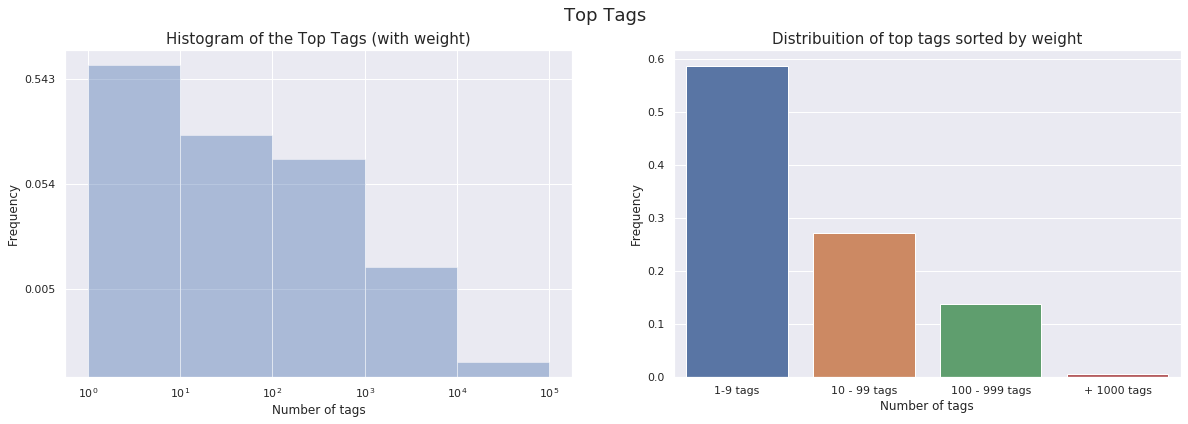

In [217]:
fig, ax = plt.subplots(1,2,figsize = (20,6))
sns.distplot(list(top_tags_count.values()),
             bins = [1, 10, 100, 1000, 10000, 100000],
             kde = False, 
             norm_hist= False,
             ax = ax[0], 
             )
total = len(top_tags_count.values())
ax[0].set(xscale = 'log', yscale = 'log')
ax[0].set_title('Histogram of the Top Tags (with weight)', fontsize = 15)
ax[0].set_ylabel('Frequency')
ax[0].set_yticklabels([np.round(10**x/total, 3) for x in (-1,0,1,2,3)])
ax[0].set_xlabel('Number of tags')

percentages = np.flip(sorted(top_tags_count.values()))/sum(top_tags_count.values())
percentages = pd.DataFrame({10**b: sum(percentages[10**b - 1:10**(b+1) - 1]) for b in (0, 1, 2, 3)}, 
                        index = ['Percentage'])

sns.barplot(data = percentages)
ax[1].set_title('Distribuition of top tags sorted by weight', fontsize = 15)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Number of tags')
ax[1].set_xticklabels(['1-9 tags', '10 - 99 tags', '100 - 999 tags', '+ 1000 tags'])

fig.suptitle('Top Tags', fontsize = 18)

plt.show()

In [219]:
top_tags_count_df = pd.DataFrame({'tag_id': list(top_tags_count.keys()), 
                                  'weight': list(top_tags_count.values())}
                                 )
tags = pd.read_csv('../data/lastfm-api/tags.csv', sep = '\t', index_col='tag_id')
tags = tags.merge(top_tags_count_df, on = 'tag_id')
tags.sort_values(by = 'weight', ascending = False).head(10)

tag_id             tag  weight
187     188             All   52112
217     218         spotify   45867
647     648        katarakt    4351
552     553      essentials    2836
648     649  scare the kids    2138
94       95    albums I own    1960
48       49             pop    1892
47       48           noise    1544
450     451     heavy metal    1502
649     650         ponyhof    1472